In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
import pickle

In [2]:
# model parameters
c = 10.0
gmax = 0.05
k1 = 5.0
k2 = 5.0
d = 0.25
alpha = 0.2
w0 = 0.2
rw = 0.2
DP = 0.1
DW = 0.1
DO = 100
param={'c':c,'gmax':gmax,'k1':k1,'d':d,'DP':DP,'alpha':alpha,'k2':k2,'w0':w0,'rw':rw,'DW':DW,'DO':DO}



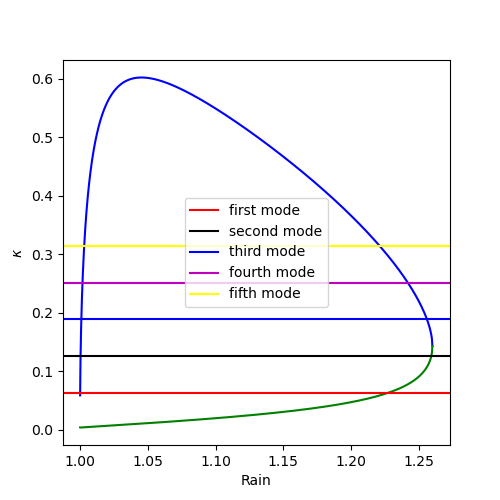

In [3]:
kappa=np.flip(np.loadtxt('Guesses1.dat'),axis=0)

L=100

N=100
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(kappa[:,0],kappa[:,1],'b')
ax.plot(kappa[:,0],kappa[:,2],'g')
ax.axhline(2*np.pi/L,color='r',label='first mode')
ax.axhline(2*2*np.pi/L,color='k',label='second mode')
ax.axhline(3*2*np.pi/L,color='b',label='third mode')
ax.axhline(4*2*np.pi/L,color='m',label='fourth mode')
ax.axhline(5*2*np.pi/L,color='yellow',label='fifth mode')
ax.legend()
ax.set_xlabel('Rain')
ax.set_ylabel(r'$\kappa$')
fig.savefig('kappaVSRain.svg')

In [4]:
#import the data
L=100
name=['sols1','sols2','sols3','sols4','sols5','sols6','sols7','sols8']
raw=[]
mode_import=['oneR0','one','twoR0','twobisR0','threeR0','threebisR0','fourR0','fourbisR0','fiveR0','sixR0','sevenR0','eightR0','nineR0']
mode=['one','one_upper','two','twobis','three','threebis','four','fourbis','five','six','seven','eight','nine']
n_files=[6,6,6,8,6,4,6,4,4,4,5,3,2]
var=['P','W','O']
N_mode=13
#iterate on mode
for j in range(N_mode):
    raw.append([])
    #iterate on variable
    for m in range(3):
        raw[j].append([])
        raw[j][m]=np.loadtxt('L%s/'%(L)+'sols1'+var[m]+mode_import[j]+'.dat')
        #iterate on name
        for i in range(1,n_files[j]):
            raw[j][m]=np.vstack((raw[j][m],np.loadtxt('L%s/'%(L)+name[i]+var[m]+mode_import[j]+'.dat')))
        #else:
        #    for i in range(1,n_files[j]):
        #        raw[j][m]=np.vstack((raw[j][m],np.loadtxt('L%s/'%(L)+name[i]+var[m]+mode_import[j]+'.dat')))


print(len(raw))

P_one=raw[0][0][:,1:]
W_one=raw[0][1][:,1:]
O_one=raw[0][2][:,1:]
Rains_one=raw[0][0][:,0]
        
P_one_upper=raw[1][0][:,1:]
W_one_upper=raw[1][1][:,1:]
O_one_upper=raw[1][2][:,1:]
Rains_one_upper=raw[1][0][:,0]
          
P_two=raw[2][0][:,1:]
W_two=raw[2][1][:,1:]
O_two=raw[2][2][:,1:]
Rains_two=raw[2][0][:,0]

P_twobis=raw[3][0][:,1:]
W_twobis=raw[3][1][:,1:]
O_twobis=raw[3][2][:,1:]
Rains_twobis=raw[3][0][:,0]

P_three=raw[4][0][:,1:]
W_three=raw[4][1][:,1:]
O_three=raw[4][2][:,1:]
Rains_three=raw[4][0][:,0]

P_threebis=raw[5][0][:,1:]
W_threebis=raw[5][1][:,1:]
O_threebis=raw[5][2][:,1:]
Rains_threebis=raw[5][0][:,0]

P_four=raw[6][0][:,1:]
W_four=raw[6][1][:,1:]
O_four=raw[6][2][:,1:]
Rains_four=raw[6][0][:,0]

P_fourbis=raw[7][0][:,1:]
W_fourbis=raw[7][1][:,1:]
O_fourbis=raw[7][2][:,1:]
Rains_fourbis=raw[7][0][:,0]


P_five=raw[8][0][:,1:]
W_five=raw[8][1][:,1:]
O_five=raw[8][2][:,1:]
Rains_five=raw[8][0][:,0]

P_six=raw[9][0][:,1:]
W_six=raw[9][1][:,1:]
O_six=raw[9][2][:,1:]
Rains_six=raw[9][0][:,0]


P_seven=raw[10][0][:,1:]
W_seven=raw[10][1][:,1:]
O_seven=raw[10][2][:,1:]
Rains_seven=raw[10][0][:,0]

P_eight=raw[11][0][:,1:]
W_eight=raw[11][1][:,1:]
O_eight=raw[11][2][:,1:]
Rains_eight=raw[11][0][:,0]

P_nine=raw[12][0][:,1:]
W_nine=raw[12][1][:,1:]
O_nine=raw[12][2][:,1:]
Rains_nine=raw[12][0][:,0]


13


In [5]:
N=np.shape(P_two[0])[0]
print(N)
Rains_hom=np.arange(0.,1.401,0.0001)

P_hom=np.zeros((np.shape(Rains_hom)[0],N))
W_hom=np.zeros((np.shape(Rains_hom)[0],N))
O_hom=np.zeros((np.shape(Rains_hom)[0],N))
for i in range(np.shape(Rains_hom)[0]):
    if Rains_hom[i]<1:
        a=1
    else:
        Ph,Wh,Oh=homogeneous(Rains_hom[i])
        P_hom[i]=(np.ones(N)*Ph)
        W_hom[i]=(np.ones(N)*Wh)
        O_hom[i]=(np.ones(N)*Oh)
        

print(np.shape(P_hom))
print(np.shape(P_two))

100
(14010, 100)
(857, 100)


In [6]:
P_mode_tot=[P_hom,P_one,P_two,P_three,P_four,P_five,P_six,P_seven,P_eight,P_nine,P_one_upper,P_twobis,P_threebis,P_fourbis]
W_mode_tot=[W_hom,W_one,W_two,W_three,W_four,W_five,W_six,W_seven,W_eight,W_nine,W_one_upper,W_twobis,W_threebis,W_fourbis]
O_mode_tot=[O_hom,O_one,O_two,O_three,O_four,O_five,O_six,O_seven,O_eight,O_nine,O_one_upper,O_twobis,O_threebis,O_fourbis]

Rains_mode_tot=[Rains_hom,Rains_one,Rains_two,Rains_three,Rains_four,Rains_five,Rains_six,Rains_seven,Rains_eight,Rains_nine,Rains_one_upper,Rains_twobis,Rains_threebis,Rains_fourbis]
name_mode=['Homogeneous solution','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1 alternative','n=2 bis','n=3 bis','n=4 bis']
color_mode=['cyan','magenta','lightgreen','red','blue','orange','violet','brown','olive','crimson','darkmagenta','darkgreen','darkred','darkblue']
N_mode=len(P_mode_tot)

In [7]:

#rain=1.
#ind=selec_rain(rain,10,20,Rains_two,np.mean(P_two,axis=1))

In [ ]:

Stab_mode_tot=[]
Lmb_mode_tot=[]
for i in range(len(P_mode_tot)):
    Stab,Lmb=stability_range(P_mode_tot[i],W_mode_tot[i],O_mode_tot[i],Rains_mode_tot[i],L,param)
    Stab_mode_tot.append(Stab)
    Lmb_mode_tot.append(Lmb)

print('done')

In [11]:

with open("L100/Rains_mode_tot.txt", "wb") as fp:   
    pickle.dump(Rains_mode_tot, fp)

with open("L100/P_mode_tot.txt", "wb") as fp:   
    pickle.dump(P_mode_tot, fp)
with open("L100/W_mode_tot.txt", "wb") as fp:   
    pickle.dump(W_mode_tot, fp)
with open("L100/O_mode_tot.txt", "wb") as fp:   
    pickle.dump(O_mode_tot, fp)

with open("L100/Stab_mode_tot.txt", "wb") as fp:   
    pickle.dump(Stab_mode_tot, fp)
with open("L100/Lmb_mode_tot.txt", "wb") as fp:   
    pickle.dump(Lmb_mode_tot, fp)

with open("L100/name_mode.txt", "wb") as fp:   
    pickle.dump(name_mode, fp)

with open("L100/color_mode.txt", "wb") as fp:   
    pickle.dump(color_mode, fp)
    
with open("L100/param.txt", "wb") as fp:   
    pickle.dump(param, fp)
 

14
14
14
14


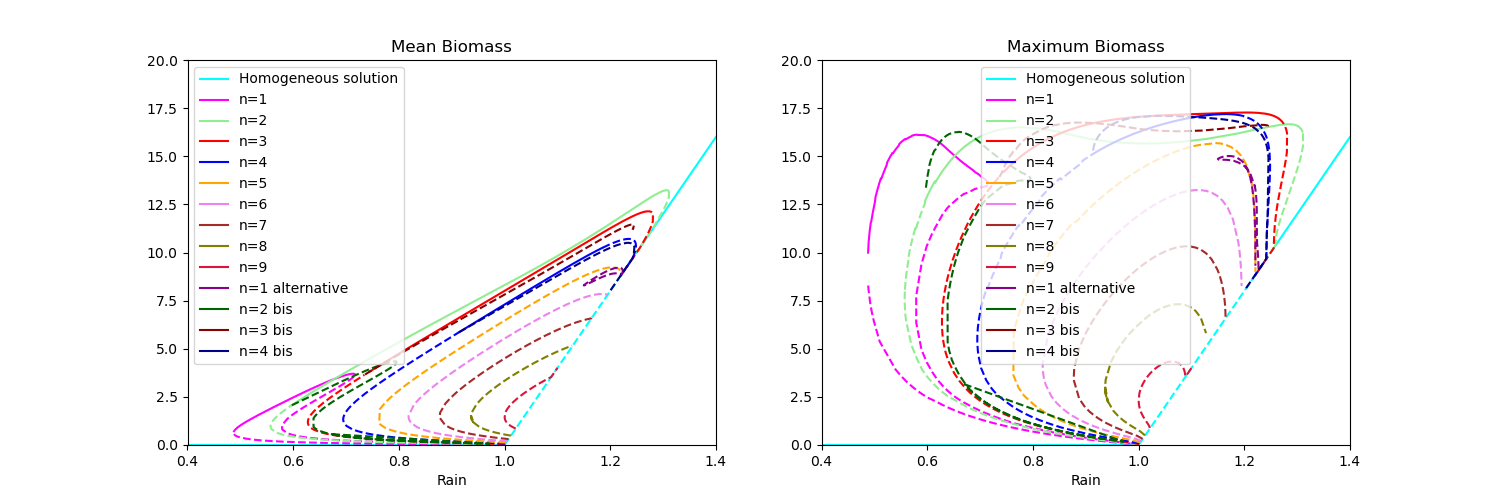

In [14]:
print(len(Stab_mode_tot))
print(len(Rains_mode_tot))
print(len(color_mode))
print(len(name_mode))
fig,ax=plt.subplots(1,2,figsize=(15,5))
for i in range(14):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i])
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid')
    ax[1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i])
    ax[1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),markersize=2,color=color_mode[i],label=name_mode[i])
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,20)
ax[0].set_title('Mean Biomass')
ax[0].set_xlabel('Rain')
ax[0].legend()
ax[1].set_xlim(0.4,1.4)
ax[1].set_ylim(0,20)
ax[1].set_title('Maximum Biomass')
ax[1].set_xlabel('Rain')
ax[1].legend()

#plt.savefig('etat.pdf')

In [2]:
rain=0.64
eps=0.001
n=0
n_mode=1
ind=selec_rain(rain,0,1,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode)

NameError: name 'selec_rain' is not defined

In [16]:
rain=0.64
eps=0.001
n=0
n_mode=1
ind=selec_rain(rain,0.25,0.6,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [45]:
rain=0.64
eps=0.001
n=0
n_mode=1
ind=[selec_rain(rain,1.0,2.,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[1]]
print(ind)
print(Rains_mode_tot[n_mode][ind])
print(np.mean(P_mode_tot[n_mode],axis=1)[ind])
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode)

[318]
[0.61901602]
[1.94445775]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [18]:
rain=0.64
eps=0.001
n=0
n_mode=1
ind=selec_rain(rain,2.5,4,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode)

[216]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

()

In [1]:
rain=0.64
eps=0.001
n=0
n_mode=2
ind=selec_rain(rain,2.5,4,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode)

NameError: name 'selec_rain' is not defined

In [32]:
rain=0.85
eps=0.001
n=0
n_mode=5
ind=selec_rain(rain,1,9,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

show_equilibria(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode)

show_stability_single(Rains_mode_tot[n_mode][ind],P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,param,L)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

100
100
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
rain=1.05
eps=0.001
n=0
n_mode=4
ind=selec_rain(rain,8,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=5000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
Rf=0.629
prec=(R-Rf)*(1/(1+np.exp(0.001*(t-5000))))+Rf
prec=R*np.ones(M)
print(prec)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[2*N:,n])
P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0,W0,O0,param)

plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode)
show_stability_single(R_full[-1],P_full[-1,:],W_full[-1,:],O_full[-1,:],param,L)



ValueError: attempt to get argmax of an empty sequence

In [14]:
rain=0.7
eps=0.001
n=0
n_mode=2
ind=selec_rain(rain,3,8,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=5000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
Rf=1.1
prec=(R-Rf)*(1/(1+np.exp(0.1*(t-3000))))+Rf
print(prec)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[2*N:,n])
P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0,W0,O0,param)

plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode)
show_stability_single(R_full[-1],P_full[-1,:],W_full[-1,:],O_full[-1,:],param,L)




ValueError: attempt to get argmax of an empty sequence

In [21]:
rain=0.96
eps=0.001
n=0
n_mode=5
ind=selec_rain(rain,3,8,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=20000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
Rf=0.65
prec=(R-Rf)*(1/(1+np.exp(0.1*(t-3000))))+Rf
print(prec)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[2*N:,n])
P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0,W0,O0,param)

plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode)
show_stability_single(R_full[-1],P_full[-1,:],W_full[-1,:],O_full[-1,:],param,L)



<ipython-input-21-fc96e683ebf5>:21: RuntimeWarning: overflow encountered in exp
  prec=(R-Rf)*(1/(1+np.exp(0.1*(t-3000))))+Rf


[0.96489088 0.96489088 0.96489088 ... 0.65       0.65       0.65      ]
100


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

100
100
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
rain=0.96
eps=0.001
n=0
n_mode=5
ind=selec_rain(rain,3,8,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=1000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
Rf=0.8
prec=(R-Rf)*(1/(1+np.exp(0.1*(t-3000))))+Rf
print(prec)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[2*N:,n])
P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0,W0,O0,param)

plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode)
show_stability_single(R_full[-1],P_full[-1,:],W_full[-1,:],O_full[-1,:],param,L)



[0.96489088 0.96489088 0.96489088 ... 0.96489088 0.96489088 0.96489088]
100


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

100
100
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
rain=1.22
eps=0.001
n=0
n_mode=5
ind=selec_rain(rain,10,11,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=5000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
Rf=R
prec=(R-Rf)*(1/(1+np.exp(0.1*(t-3000))))+Rf
print(prec)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[2*N:,n])
P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0,W0,O0,param)

plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode)
show_stability_single(R_full[-1],P_full[-1,:],W_full[-1,:],O_full[-1,:],param,L)



[1.22074928 1.22074928 1.22074928 ... 1.22074928 1.22074928 1.22074928]
100


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

100
100
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
rain=0.96
eps=0.001
n=0
n_mode=3
ind=selec_rain(rain,3,8,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=10000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
Rf=1.22
prec=(R-Rf)*(1/(1+np.exp(0.1*(t-3000))))+Rf
print(prec)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[2*N:,n])
P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0,W0,O0,param)

plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode)
show_stability_single(R_full[-1],P_full[-1,:],W_full[-1,:],O_full[-1,:],param,L)



[0.96004192 0.96004192 0.96004192 ... 1.22       1.22       1.22      ]
100


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

100
100
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …